<a href="https://colab.research.google.com/github/beeofpossible/RSI-Analysis/blob/main/True_StratRSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

!pip install ta 
!pip install yfinance

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=4494f94c08177ea54e35584ea39440c2339cee42d63bef3a747a8b8876936ee0
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta
     |████████████████████████████████| 63 kB 834 kB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

In [ ]:
!pip install hurst

In [ ]:
! pip install plotly --upgrade

     |████████████████████████████████| 27.7 MB 41.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3701    0  3701    0     0  15044      0 --:--:-- --:--:-- --:--:-- 15044
100  503k  100  503k    0     0   904k      0 --:--:-- --:--:-- --:--:--  904k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3745    0  3745    0     0  17178      0 --:--:-- --:--:-- --:--:-- 17100
100  406k  100  406k    0     0   806k      0 --:--:-- --:--:-- --:--:--  806k


In [ ]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import tensorflow as tf
import ta
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib as mpl 
from matplotlib import cycler
colors = cycler('color', 
                ['#669FEE', "#66EE91", '#9988DD', 
                 "#EECC55", '#88BB44', "#FFBBBB"] )
plt.rc('figure', facecolor = '#313233')
plt.rc('axes', facecolor = "#313233", edgecolor = 'none', 
       axisbelow = True, grid = True, prop_cycle = colors, 
       labelcolor ='gray')
plt.rc('grid', color ='474A4A', linestyle ='solid')
plt.rc('xtick', color = 'gray')
plt.rc('ytick', direction = "out", color='gray')
plt.rc('legend', facecolor='#313233', edgecolor ='#313233')
plt.rc('text', color= '#C9C9C9')

In [ ]:
#import the data 
f = yf.download("GFC.PA")

[*********************100%***********************]  1 of 1 completed


In [ ]:
f["rsi"] = ta.momentum.RSIIndicator(f["Adj Close"], window = 14).rsi()
f

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
1992-07-08,23.511553,23.511553,23.511553,23.511553,1.479872,727.0,NaN
1992-07-09,23.736076,23.736076,23.736076,23.736076,1.494004,518.0,NaN
1992-07-10,23.589647,23.589647,23.589647,23.589647,1.484788,680.0,NaN
1992-07-13,23.589647,23.589647,23.589647,23.589647,1.484788,0.0,NaN
1992-07-14,23.589647,23.589647,23.589647,23.589647,1.484788,0.0,NaN
...,...,...,...,...,...,...,...
2022-03-10,107.849998,109.199997,105.550003,106.199997,106.199997,172438.0,46.165665
2022-03-11,106.400002,108.400002,105.849998,107.849998,107.849998,128851.0,48.671797
2022-03-14,108.349998,111.400002,108.349998,110.150002,110.150002,146444.0,52.024483


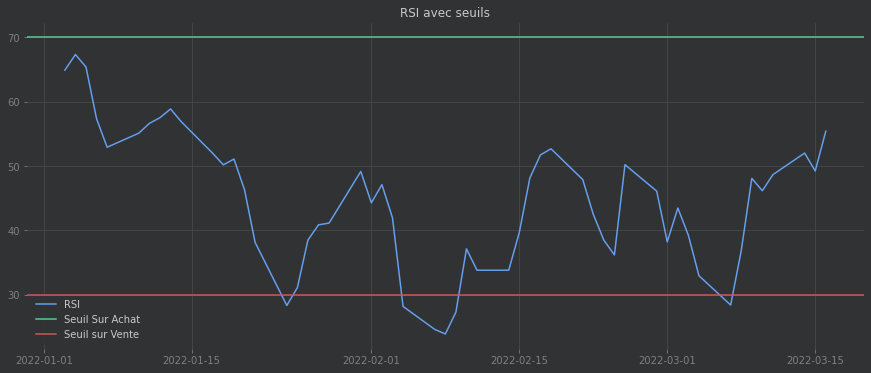

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(f["rsi"].loc["2022"])
plt.axhline(70, color ="#57CE95")
plt.axhline(30, color ="#CE5757")
plt.title('RSI avec seuils')
plt.legend(["RSI", "Seuil Sur Achat", "Seuil sur Vente"])

plt.show()

In [ ]:
overbuy = 70
neutral_buy = 55

f['signal_long'] = np.nan 
f["yesterday_rsi"] = f['rsi'].shift(1)

f.loc[(f['rsi']>neutral_buy) & (f['yesterday_rsi']<neutral_buy), "signal_long"] = 1

f.loc[(f['rsi']<neutral_buy) & (f['yesterday_rsi']>neutral_buy), "signal_long"] = 0

f.loc[(f['rsi']>overbuy) & (f['yesterday_rsi']<overbuy), "signal_long"] = 0

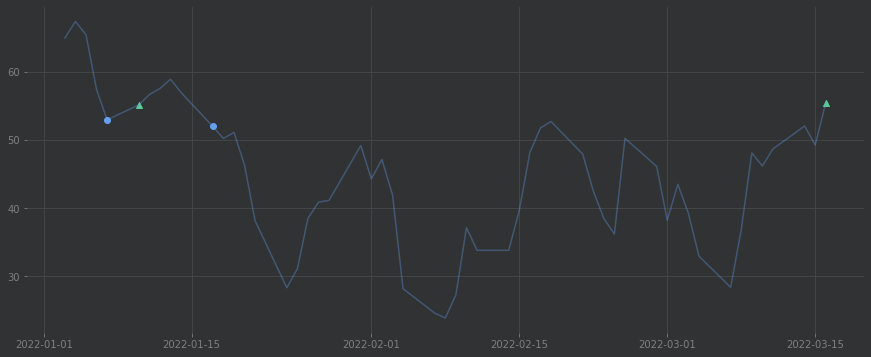

In [ ]:
idx_open = f.loc[f["signal_long"]==1].loc["2022"].index
idx_close = f.loc[f["signal_long"]==0].loc["2022"].index

plt.figure(figsize =(15,6))
plt.scatter(idx_open, f.loc[idx_open]['rsi'].loc['2022'], color = '#57CE95', marker='^')

plt.scatter(idx_close, f.loc[idx_close]['rsi'].loc['2022'], color = '#669FEE', marker='o')

plt.plot(f["rsi"].loc["2022"].index, f["rsi"].loc['2022'], alpha=0.35)
plt.show()

In [ ]:
oversell = 30
neutral_sell = 45

f['signal_short']= np.nan

f.loc[(f['rsi']<neutral_sell) & (f["yesterday_rsi"]>neutral_sell), "signal_short"] = -1
f.loc[(f['rsi']>neutral_sell) & (f["yesterday_rsi"]<neutral_sell), "signal_short"] = 0
f.loc[(f['rsi']>oversell) & (f["yesterday_rsi"]<oversell), "signal_short"] = 0

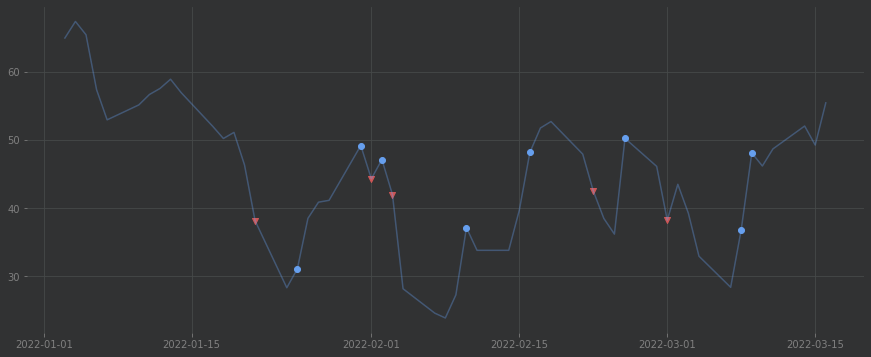

In [ ]:
idx_open = f.loc[f["signal_short"] ==-1].loc["2022"].index
idx_close = f.loc[f["signal_short"] ==0].loc["2022"].index

plt.figure(figsize =(15,6))
plt.scatter(idx_open,f.loc[idx_open]['rsi'].loc['2022'], color = '#CE5757', marker='v')

plt.scatter(idx_close, f.loc[idx_close]['rsi'].loc['2022'], color = '#669FEE', marker='o')

plt.plot(f["rsi"].loc["2022"].index, f["rsi"].loc['2022'], alpha=0.35)

plt.show()

In [ ]:
f['Position'] = (f['signal_short'].fillna(method='ffill')+ f['signal_long'].fillna(method='ffill'))

<function matplotlib.pyplot.show>

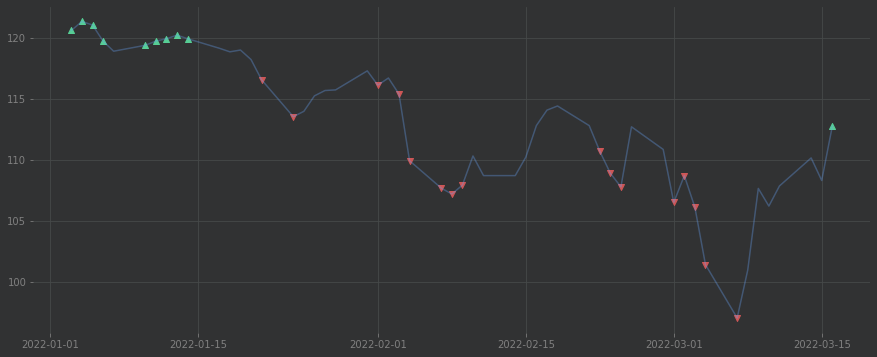

In [ ]:
year = "2022"
idx_long = f.loc[f['Position']==1].loc[year].index
idx_short = f.loc[f['Position']==-1].loc[year].index


plt.figure(figsize=(15,6))

plt.scatter(idx_short,f.loc[idx_short]['Adj Close'].loc[year], color = '#CE5757', marker='v')

plt.scatter(idx_long,f.loc[idx_long]['Adj Close'].loc[year], color = '#57CE95', marker='^')

plt.plot(f["Adj Close"].loc[year].index, f["Adj Close"].loc[year], alpha = 0.35)

plt.show


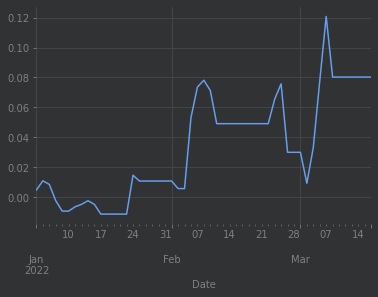

In [ ]:
f['pct']= f['Adj Close'].pct_change(1)
f['return'] = f["pct"] *(f["Position"].shift(1))
f['return'].loc[year].cumsum().plot()

In [ ]:
def RSI(val, neutral, window):
  if "Adj Close" not in val.columns: 
    ValueErrror('We need have a columns name Adj Close because all computation are about this column')
  
  val['rsi'] = ta.momentum.RSIIndicator(f['Adj Close'], window=window).rsi()
  """Long sell signal """
  overbuy = 70
  neutral_buy = 50 - neutral
  val['signal_long'] = np.nan 
  val["yesterday_rsi"] = val['rsi'].shift(1)
  val.loc[(val['rsi']>neutral_buy) & (val['yesterday_rsi']<neutral_buy), "signal_long"] = 1
  val.loc[(val['rsi']<neutral_buy) & (val['yesterday_rsi']>neutral_buy), "signal_long"] = 0
  val.loc[(val['rsi']>overbuy) & (val['yesterday_rsi']<overbuy), "signal_long"] = 0
  
  """' Short sell signal """
  oversell = 30
  neutral_sell = 50 - neutral
  val['signal_short']= np.nan
  val.loc[(val['rsi']<neutral_sell) & (val["yesterday_rsi"]>neutral_sell), "signal_short"] = -1
  val.loc[(val['rsi']>neutral_sell) & (val["yesterday_rsi"]<neutral_sell), "signal_short"] = 0
  val.loc[(val['rsi']>oversell) & (val["yesterday_rsi"]<oversell), "signal_short"] = 0
  
  """ Compute the returns """
  val['pct']= val['Adj Close'].pct_change(1)
  val['Position'] = (val['signal_short'].fillna(method='ffill')+ val['signal_long'].fillna(method='ffill'))
  val['return'] = val["pct"] *(val["Position"].shift(1))
  return val['return']
    

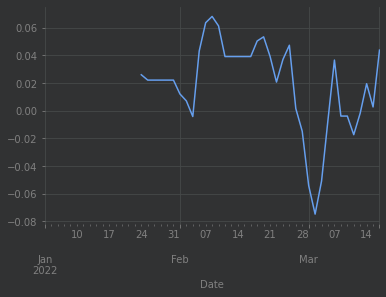

In [ ]:
RSI(f.loc["2022"], 5, 14).cumsum().plot()

### BACKTEST

##Sortino (alpha, bêta)

Le ratio de sortino ne prend en compte que la volatilité des gains négatifs car c'est ce que l'on craint et non les gains haussiers qui nous font gagner de l'argent. 

Ratio de sortino < 0 : investissement non rentable car vos gains sont négatifs

Ratio de Sortino < 1 : investissement rentable mais le risque de l'investissement est supérieur aux gains 

Ratio de Sortino > 1 : Très bon investissement car le risque est supérieur aux gains 

In [ ]:
# Prepare the data 
f = yf.download('^FCHI', end = '2022-03-10')
return_serie = f['Adj Close'].pct_change(1).dropna()
return_serie.name =  "return"
#compute the sortino 

moyenne = np.mean(return_serie)
vol = np.std(return_serie[return_serie<0])
sortino = moyenne/vol
sortino_annuel = np.sqrt(252) * moyenne/vol

print(f"Sortino : {'%.3f' % sortino}")
print(f"Sortino annuel: {'%.3f' % sortino_annuel}")

[*********************100%***********************]  1 of 1 completed
Sortino : 0.025
Sortino annuel: 0.394


### BETA

Est une statistique qui indique la relation entre les variations de notre portefeuille et celles du marché qui est représenté par un indice (par exemple SP500)

abs(beta) <1 : C'est bon car cela signifique que votre portefeuille a une variation moindre que l'indice. Si beta = 0,9, cela signifique que si l'indice varie de 1, le portefeuille varie de 0,9

abs(beta) >1 Ce n'est pas une bonne chose car cela signifie que votre portefeuille a une variation + importante que l'indice. Si beta = 1.1, cela signifie que l'indice varie de 1 le portefeuille varie de 1.1 

In [ ]:
sp500 = yf.download("^GSPC")['Adj Close'].pct_change(1)
sp500.name = "SP500"

val = pd.concat((return_serie, sp500), axis =1).dropna()

matrice_var_cov = np.cov(val.values, rowvar=False)
cov = matrice_var_cov[0][1]
var = matrice_var_cov[1][1]

beta = cov/var

print(f"Beta: {'%.3f'% beta} ")

[*********************100%***********************]  1 of 1 completed
Beta: 0.631 


In [ ]:
def beta_function(serie):

  # Get SP500 data
  sp500 = yf.download("^GSPC")[["Adj Close"]].pct_change(1)

  # Change column name
  sp500.columns = ["SP500"]

  # Concatenate
  g = pd.concat((serie,sp500), axis=1)

  # Compute the beta
  beta = np.cov(g[[serie.name, "SP500"]].dropna().values,rowvar=False)[0][1] / np.var(g["SP500"].dropna().values)
  return beta

###ALPHA 

L'alpha est une statistique qui indique si le portefeuille surpasse le marché en terme de rendement du risque

alpha >0 : le portefeuille surperforme le marché en terme de rendement risque alpha <0 : le portefeuille sousperforme le marché en terme de rendement de risque

In [ ]:
alpha = (252* (1-beta) * moyenne)*100 #pour mensualiser : faire *12 et non pas *252. Données annualisées
print(f"Alpha: {'%.1f' %alpha} %")

Alpha: 2.3 %


###DRAWDOWN

Le drawdown est une mesure de risque de la stratégie. Une stat intéressante pour connaitre la performance de l'algorythme est le maximum drawdown. En effet, il représente la perte maximale d'une stratégie sur une période de temps qui vous permet de comprendre si la stratégie est risquée et donc de la choisir en fonction de votre niveau d'aversion au risque

Les pics correspondent aux pires moments pour entrer : les pertes seront de X% (cf schéma 1) si on rentre au plus haut sur le schéma 2

In [ ]:
def drawdown_function(serie): 

  cum = serie.dropna().cumsum()+1 #(1+serie).cuprod() - 1 ::: si stratégie basée sur les rendements cumulés 
  #calcule le maximum cumulé 
  running_m = np.maximum.accumulate(cum)

  drawdown = cum/running_m -1 

  return drawdown

<function matplotlib.pyplot.show>

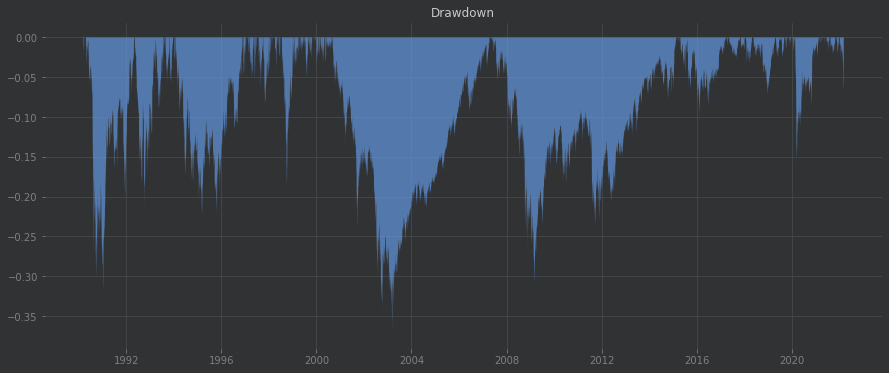

In [ ]:
drawdown = drawdown_function(return_serie)

plt.figure(figsize=(15,6))

#le drawdown ne peut jamais être positif 
plt.fill_between(drawdown.index, drawdown, 0, drawdown<0, alpha= 0.65)

plt.title(f'Drawdown')
plt.show

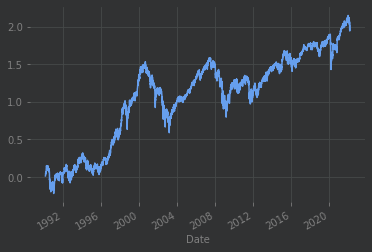

In [ ]:
return_serie.cumsum().plot()

In [ ]:
# un drawdown sup à 15 est déjà extrêmement risqué 
max_drawdown = -np.min(drawdown)*100
print(f"Max drawdown: {'%.1f' %max_drawdown}")

Max drawdown: 37.2


In [ ]:
def Backtest(serie): 
  sp500 = yf.download('^GSPC')['Adj Close'].pct_change(1)

  sp500.name = "SP500"

  val =pd.concat((return_serie, sp500), axis =1).dropna()
  drawdown = drawdown_function(serie)
  max_drawdown = -np.min(drawdown)

  fig, (cum, dra) = plt.subplots(1,2)
  fig.suptitle('Backtesting', size =20)
  cum.plot(serie.cumsum()*100, color ="#39B3C7")
  cum.plot(val["SP500"].cumsum()*100, color ="#B85A0F")
  cum.legend(["Portfolio", "SP500"])
  cum.set_title('Cumulative Return', size=13)
  cum.set_ylabel('Cumulative Return %', size=11)
  dra.fill_between(drawdown.index, 0, drawdown, color="#C73954", alpha =0.65)
  dra.set_title("Drawdown", size =13)
  dra.set_ylabel('Drawdown %', size =11)

  plt.show()

  sortino = np.sqrt(252)*serie.mean()/serie.loc[serie<0].std()

  beta = np.cov(val[['return', 'SP500']].values, rowvar=False)[0][1]/np.var(val['SP500'].values)

  alpha = 252*serie.mean()-252*beta*serie.mean()
  
  print(f"Sortino : {np.round(sortino,3)}")
  print(f"Beta : {np.round(beta,3)}")
  print(f"Alpha : {np.round(alpha,3)}")
  print(f"MaxDrawdown : {np.round(max_drawdown*100,3)} %")


[*********************100%***********************]  1 of 1 completed


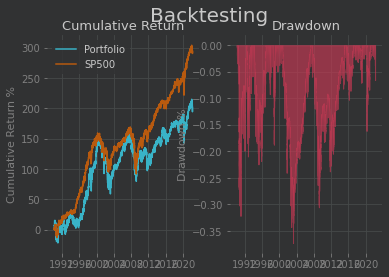

Sortino : 0.394
Beta : 0.631
Alpha : 0.023
MaxDrawdown : 37.249 %


In [ ]:
Backtest(return_serie)

[*********************100%***********************]  1 of 1 completed


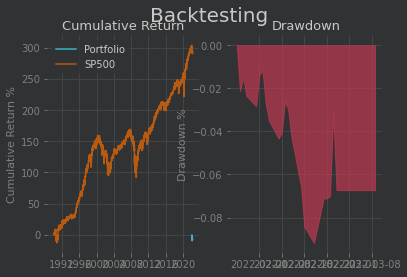

Sortino : -3.879
Beta : 0.631
Alpha : -0.215
MaxDrawdown : 9.178 %


In [ ]:
##test final sur les données de base
rsi = RSI(f.loc["2022"], 5, 14).dropna()
Backtest(rsi)

###Trouver les meilleurs actifs

L'exposant de Hurst

0,5<Hurst< mouvement tendanciel 
0,5 = Hurst : marche aléatoire 
0<Hurst<0,5 : mouvement anti-persistant

In [ ]:
#Trending 
import hurst
from hurst import *
arr = np.linspace(0,300,150)
hurst = compute_Hc(arr)[0]

print(hurst)

plt.plot(arr)
plt.title(f"{hurst}")
plt.show()

0.0390560014289303


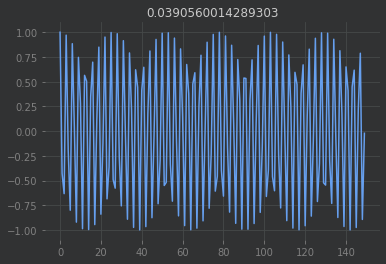

In [ ]:
#Trending 
import hurst
from hurst import *
arr = np.linspace(0,300,150)
hurst = compute_Hc(np.cos(arr))[0]

print(hurst)

plt.plot(np.cos(arr))
plt.title(f"{hurst}")
plt.show()

0.5198396417527201


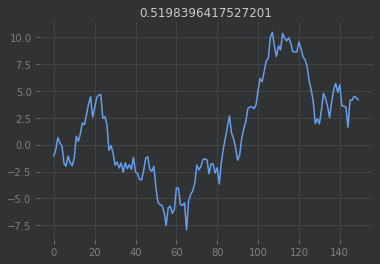

In [ ]:
np.random.seed(56)
arr = np.cumsum(np.random.randn(150))
hurst = compute_Hc(arr)[0]

print(hurst)

plt.plot(arr)
plt.title(f"{hurst}")
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving Names.csv to Names.csv


{'Names.csv': b',Symbol,dummy\n0,EURUSD=X,Currency\n1,EURGBP=X,Currency\n2,EURCHF=X,Currency\n3,EURCAD=X,Currency\n4,EURCNY=X,Currency\n5,EURJPY=X,Currency\n6,EURSEK=X,Currency\n7,EURHUF=X,Currency\n8,GBPUSD=X,Currency\n9,GBPCNY=X,Currency\n10,GBPJPY=X,Currency\n11,USDCHF=X,Currency\n12,USDCAD=X,Currency\n13,USDCNY=X,Currency\n14,USDHKD=X,Currency\n15,USDSGD=X,Currency\n16,USDINR=X,Currency\n17,USDMXN=X,Currency\n18,USDPHP=X,Currency\n19,USDTHB=X,Currency\n20,USDMYR=X,Currency\n21,USDZAR=X,Currency\n22,USDJPY=X,Currency\n23,AUDJPY=X,Currency\n24,NZDUSD=X,Currency\n0,BTC-USD,Crypto\n1,ETH-USD,Crypto\n2,BNB-USD,Crypto\n3,USDT-USD,Crypto\n4,XRP-USD,Crypto\n5,ADA-USD,Crypto\n6,DOGE-USD,Crypto\n7,DOT1-USD,Crypto\n8,UNI3-USD,Crypto\n9,LTC-USD,Crypto\n10,BCH-USD,Crypto\n11,LINK-USD,Crypto\n12,VET-USD,Crypto\n13,USDC-USD,Crypto\n14,SOL1-USD,Crypto\n15,XLM-USD,Crypto\n16,FIL-USD,Crypto\n17,THETA-USD,Crypto\n18,TRX-USD,Crypto\n19,XMR-USD,Crypto\n20,LUNA1-USD,Crypto\n21,NEO-USD,Crypto\n22,EOS-USD

In [ ]:
from tqdm import tqdm
 # We dowload Names.csv because it contains many yahoo ticler
assets = pd.read_csv("Names.csv")["Symbol"]

# Initialize our lists
Statistics = []
col = []

for fin in tqdm(assets):

  # We put try for the asset which have less than 100 values
  try:
    print(fin)
    
    # We download data for each asset
    f = yf.download(fin).dropna()

    # Create a list to put the following statistics
    statistics = list()

    # Compute the Hurst
    statistics.append(compute_Hc(f["Adj Close"])[0])

    # Compute the volatility
    statistics.append(np.sqrt(252)*f["Adj Close"].pct_change(1).dropna().std())

    # Compute the beta
    statistics.append(beta_function(f["Adj Close"].pct_change(1).dropna()))

    # Compute strat return
    statistics.append(RSI(f,5,14).mean()*252)

    # Put statistics list in Statistics to have a list of lists
    Statistics.append(statistics)
    
    # Put column name in the list because some columns dont have 100 values
    col.append(fin)
  
  # If the assets has not 100 values we pass to the next
  except:
    pass


  0%|          | 0/152 [00:00<?, ?it/s]

EURUSD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  1%|          | 1/152 [00:00<01:49,  1.38it/s]


EURGBP=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  1%|▏         | 2/152 [00:01<01:54,  1.31it/s]


EURCHF=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  2%|▏         | 3/152 [00:02<01:49,  1.36it/s]


EURCAD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  3%|▎         | 4/152 [00:02<01:51,  1.33it/s]


EURCNY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  3%|▎         | 5/152 [00:03<01:48,  1.36it/s]


EURJPY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  4%|▍         | 6/152 [00:04<01:50,  1.32it/s]


EURSEK=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  5%|▍         | 7/152 [00:05<01:51,  1.30it/s]


EURHUF=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  5%|▌         | 8/152 [00:06<01:49,  1.32it/s]


GBPUSD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  6%|▌         | 9/152 [00:06<01:49,  1.30it/s]


GBPCNY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  7%|▋         | 10/152 [00:07<01:51,  1.28it/s]


GBPJPY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  7%|▋         | 11/152 [00:08<01:46,  1.33it/s]


USDCHF=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  8%|▊         | 12/152 [00:09<01:42,  1.37it/s]


USDCAD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  9%|▊         | 13/152 [00:09<01:39,  1.40it/s]


USDCNY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  9%|▉         | 14/152 [00:10<01:40,  1.37it/s]


USDHKD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 10%|▉         | 15/152 [00:11<01:41,  1.36it/s]


USDSGD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 11%|█         | 16/152 [00:11<01:42,  1.33it/s]


USDINR=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 11%|█         | 17/152 [00:12<01:40,  1.35it/s]


USDMXN=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 18/152 [00:13<01:39,  1.35it/s]


USDPHP=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 12%|█▎        | 19/152 [00:14<01:37,  1.36it/s]


USDTHB=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 20/152 [00:14<01:37,  1.35it/s]


USDMYR=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 21/152 [00:15<01:34,  1.38it/s]


USDZAR=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 22/152 [00:16<01:35,  1.36it/s]


USDJPY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 23/152 [00:17<01:42,  1.26it/s]


AUDJPY=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 24/152 [00:18<01:38,  1.30it/s]


NZDUSD=X
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 16%|█▋        | 25/152 [00:18<01:38,  1.29it/s]


BTC-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 26/152 [00:19<01:36,  1.31it/s]


ETH-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 27/152 [00:20<01:31,  1.36it/s]


BNB-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 28/152 [00:20<01:27,  1.41it/s]


USDT-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 29/152 [00:21<01:24,  1.45it/s]


XRP-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 20%|█▉        | 30/152 [00:22<01:22,  1.49it/s]


ADA-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 20%|██        | 31/152 [00:22<01:19,  1.51it/s]


DOGE-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 21%|██        | 32/152 [00:23<01:18,  1.54it/s]


DOT1-USD
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 33/152 [00:23<00:58,  2.05it/s]


UNI3-USD
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 34/152 [00:23<00:44,  2.66it/s]


LTC-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 35/152 [00:24<00:52,  2.23it/s]


BCH-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 24%|██▎       | 36/152 [00:24<00:59,  1.96it/s]


LINK-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 24%|██▍       | 37/152 [00:25<01:02,  1.84it/s]


VET-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 25%|██▌       | 38/152 [00:26<01:04,  1.76it/s]


USDC-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 26%|██▌       | 39/152 [00:26<01:06,  1.71it/s]


SOL1-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 26%|██▋       | 40/152 [00:27<01:06,  1.68it/s]


XLM-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 27%|██▋       | 41/152 [00:28<01:09,  1.60it/s]


FIL-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 42/152 [00:28<01:08,  1.60it/s]


THETA-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 43/152 [00:29<01:10,  1.55it/s]


TRX-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 29%|██▉       | 44/152 [00:30<01:09,  1.55it/s]


XMR-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 30%|██▉       | 45/152 [00:30<01:08,  1.56it/s]


LUNA1-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 30%|███       | 46/152 [00:31<01:07,  1.57it/s]


NEO-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 31%|███       | 47/152 [00:31<01:06,  1.58it/s]


EOS-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 48/152 [00:32<01:05,  1.58it/s]


MIOTA-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 49/152 [00:33<01:06,  1.56it/s]


BSV-USD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 33%|███▎      | 50/152 [00:33<01:05,  1.56it/s]


AAPL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 34%|███▎      | 51/152 [00:34<01:14,  1.36it/s]


MSFT
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 34%|███▍      | 52/152 [00:35<01:20,  1.25it/s]


AMZN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 35%|███▍      | 53/152 [00:36<01:18,  1.26it/s]


TSLA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 54/152 [00:37<01:14,  1.31it/s]


FB
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 55/152 [00:37<01:12,  1.34it/s]


GOOG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 56/152 [00:38<01:11,  1.35it/s]


GOOGL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 57/152 [00:39<01:11,  1.34it/s]


NVDA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 58/152 [00:40<01:11,  1.32it/s]


PYPL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 59/152 [00:40<01:06,  1.39it/s]


INTC
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 60/152 [00:41<01:11,  1.30it/s]


CMCSA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 40%|████      | 61/152 [00:42<01:14,  1.23it/s]


NFLX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 41%|████      | 62/152 [00:43<01:11,  1.27it/s]


ADBE
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 41%|████▏     | 63/152 [00:44<01:09,  1.27it/s]


CSCO
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 64/152 [00:44<01:09,  1.27it/s]


PEP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 65/152 [00:45<01:13,  1.18it/s]


AVGO
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 66/152 [00:46<01:09,  1.23it/s]


TXN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 44%|████▍     | 67/152 [00:47<01:15,  1.13it/s]


TMUS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 68/152 [00:48<01:09,  1.21it/s]


COST
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 69/152 [00:49<01:10,  1.17it/s]


QCOM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 46%|████▌     | 70/152 [00:50<01:11,  1.15it/s]


AMGN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 71/152 [00:51<01:10,  1.15it/s]


SBUX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 72/152 [00:51<01:10,  1.14it/s]


AMAT
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 48%|████▊     | 73/152 [00:52<01:09,  1.13it/s]


CHTR
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 49%|████▊     | 74/152 [00:53<01:03,  1.23it/s]


INTU
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 75/152 [00:54<01:03,  1.21it/s]


MU
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 50%|█████     | 76/152 [00:55<01:04,  1.18it/s]


BKNG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 51%|█████     | 77/152 [00:56<01:02,  1.21it/s]


AMD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 51%|█████▏    | 78/152 [00:56<01:02,  1.19it/s]


LRCX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 79/152 [00:57<01:00,  1.20it/s]


ISRG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 80/152 [00:58<00:57,  1.26it/s]


MDLZ
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 81/152 [00:59<00:55,  1.28it/s]


GILD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 54%|█████▍    | 82/152 [00:59<00:54,  1.28it/s]


FISV
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 55%|█████▍    | 83/152 [01:00<00:53,  1.28it/s]


ADP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 84/152 [01:01<00:56,  1.20it/s]


ZM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 56%|█████▌    | 85/152 [01:02<00:50,  1.32it/s]


MELI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 86/152 [01:02<00:46,  1.42it/s]


ATVI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 87/152 [01:03<00:46,  1.39it/s]


CSX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 88/152 [01:04<00:50,  1.27it/s]


JD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 59%|█████▊    | 89/152 [01:05<00:46,  1.35it/s]


ADSK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 90/152 [01:06<00:47,  1.29it/s]


BIDU
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 60%|█████▉    | 91/152 [01:06<00:46,  1.32it/s]


ILMN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 61%|██████    | 92/152 [01:07<00:45,  1.32it/s]


ADI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 61%|██████    | 93/152 [01:08<00:46,  1.27it/s]


NXPI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 94/152 [01:09<00:43,  1.32it/s]


VRTX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 62%|██████▎   | 95/152 [01:09<00:43,  1.30it/s]


KLAC
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 96/152 [01:10<00:47,  1.18it/s]


MRNA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 97/152 [01:11<00:42,  1.29it/s]


PDD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 98/152 [01:12<00:38,  1.39it/s]


REGN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 99/152 [01:12<00:38,  1.37it/s]


KHC
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 66%|██████▌   | 100/152 [01:13<00:36,  1.42it/s]


MNST
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 66%|██████▋   | 101/152 [01:14<00:38,  1.32it/s]


KDP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 102/152 [01:15<00:37,  1.34it/s]


MAR
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 103/152 [01:15<00:36,  1.33it/s]


ASML
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 104/152 [01:16<00:36,  1.32it/s]


WBA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 105/152 [01:17<00:37,  1.25it/s]


WDAY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 70%|██████▉   | 106/152 [01:18<00:35,  1.29it/s]


ROST
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 70%|███████   | 107/152 [01:19<00:36,  1.22it/s]


ALGN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 71%|███████   | 108/152 [01:19<00:34,  1.27it/s]


EXC
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 109/152 [01:20<00:36,  1.17it/s]


MCHP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 110/152 [01:21<00:35,  1.18it/s]


AEP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 111/152 [01:22<00:37,  1.09it/s]


EBAY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 74%|███████▎  | 112/152 [01:23<00:35,  1.14it/s]


CTSH
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 74%|███████▍  | 113/152 [01:24<00:33,  1.17it/s]


IDXX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 114/152 [01:25<00:31,  1.20it/s]


BIIB
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 76%|███████▌  | 115/152 [01:26<00:30,  1.19it/s]


EA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 76%|███████▋  | 116/152 [01:26<00:29,  1.22it/s]


CDNS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 117/152 [01:27<00:29,  1.18it/s]


SNPS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 118/152 [01:28<00:28,  1.18it/s]


LULU
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 119/152 [01:29<00:25,  1.28it/s]


MTCH
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 120/152 [01:30<00:26,  1.23it/s]


DOCU
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 80%|███████▉  | 121/152 [01:30<00:23,  1.30it/s]


XEL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 80%|████████  | 122/152 [01:31<00:26,  1.15it/s]


CTAS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 81%|████████  | 123/152 [01:32<00:25,  1.14it/s]


ORLY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 124/152 [01:33<00:23,  1.18it/s]


DXCM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 125/152 [01:34<00:21,  1.24it/s]


PAYX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 126/152 [01:35<00:21,  1.22it/s]


MRVL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 84%|████████▎ | 127/152 [01:35<00:20,  1.25it/s]


ALXN
[*********************100%***********************]  1 of 1 completed

 84%|████████▍ | 128/152 [01:35<00:14,  1.69it/s]



1 Failed download:
- ALXN: No data found, symbol may be delisted
PCAR
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 85%|████████▍ | 129/152 [01:36<00:16,  1.43it/s]


NTES
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 86%|████████▌ | 130/152 [01:37<00:15,  1.41it/s]


XLNX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 86%|████████▌ | 131/152 [01:38<00:15,  1.38it/s]


SWKS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 132/152 [01:39<00:15,  1.29it/s]


ANSS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 133/152 [01:40<00:14,  1.28it/s]


PTON
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 134/152 [01:40<00:12,  1.39it/s]


TEAM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 135/152 [01:41<00:11,  1.43it/s]


VRSK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 136/152 [01:41<00:10,  1.46it/s]


FAST
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 137/152 [01:42<00:11,  1.35it/s]


OKTA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 91%|█████████ | 138/152 [01:43<00:09,  1.41it/s]


DLTR
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 91%|█████████▏| 139/152 [01:44<00:09,  1.40it/s]


CPRT
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 92%|█████████▏| 140/152 [01:45<00:08,  1.35it/s]


SGEN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 141/152 [01:45<00:08,  1.34it/s]


SIRI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 142/152 [01:46<00:07,  1.32it/s]


MXIM
[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 143/152 [01:46<00:05,  1.78it/s]



1 Failed download:
- MXIM: No data found, symbol may be delisted
CDW
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 95%|█████████▍| 144/152 [01:47<00:04,  1.60it/s]


VRSN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 95%|█████████▌| 145/152 [01:48<00:04,  1.50it/s]


SPLK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 96%|█████████▌| 146/152 [01:48<00:03,  1.52it/s]


CERN
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 147/152 [01:49<00:03,  1.39it/s]


TCOM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 148/152 [01:50<00:02,  1.38it/s]


INCY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 149/152 [01:51<00:02,  1.36it/s]


CHKP
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 99%|█████████▊| 150/152 [01:51<00:01,  1.36it/s]


FOXA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 99%|█████████▉| 151/152 [01:52<00:00,  1.42it/s]


FOX
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

100%|██████████| 152/152 [01:53<00:00,  1.34it/s]

In [ ]:
# We create dataframe with all the previous statistics
resume = pd.DataFrame(Statistics, columns=["Hurst", "Volatility", "Beta", "Sum strategy Returns"], index=col)
resume

,Hurst,Volatility,Beta,Sum strategy Returns
EURUSD=X,0.438425,0.116548,0.126238,-0.018784
EURGBP=X,0.513010,0.082431,-0.032633,-0.042542
EURCHF=X,0.540127,0.078630,0.095563,-0.019148
EURCAD=X,0.452688,0.091965,-0.082578,-0.022838
EURCNY=X,0.459406,0.129734,0.070366,-0.161056
...,...,...,...,...
TCOM,0.524496,0.509736,1.715543,-0.033918
INCY,0.503605,0.655740,1.939762,-0.014322
CHKP,0.491180,0.519124,1.749180,-0.031917
FOXA,0.511834,0.380821,1.833341,0.004131


In [ ]:
# We extract classe of the actif 
clustering = pd.read_csv("Names.csv", index_col="Symbol")
del clustering["Unnamed: 0"]
clustering

,dummy
Symbol,
EURUSD=X,Currency
EURGBP=X,Currency
EURCHF=X,Currency
EURCAD=X,Currency
EURCNY=X,Currency
...,...
TCOM,Asset
INCY,Asset
CHKP,Asset


In [ ]:
# Concat resume clustering to have the classe of the assets
g = pd.concat((resume,clustering), axis=1).dropna()

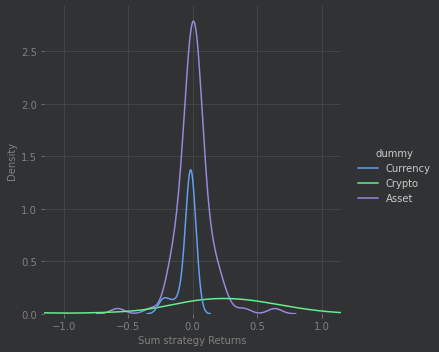

In [ ]:
# We are going to plot the density of the strategy returns by the classe of the assets

import seaborn as sns
# Plot the densities
sns.displot(data=g, x="Sum strategy Returns", kind="kde", hue="dummy")

# Limit the axis
plt.xlim((-1.15,1.15))

# plot the graph
plt.show()

In [ ]:
# Describe by currency
g.loc[g["dummy"]=="Currency"].describe()

,Hurst,Volatility,Beta,Sum strategy Returns
count,25.000000,25.000000,25.000000,25.000000
mean,0.504190,0.099839,0.011470,-0.042334
std,0.050957,0.035650,0.189566,0.068185
min,0.393123,0.010809,-0.413827,-0.244698
25%,0.478068,0.082431,-0.082578,-0.042542
50%,0.497871,0.094533,0.000238,-0.019382
75%,0.540127,0.125014,0.111662,-0.005166
max,0.643490,0.173405,0.464942,0.027807


In [ ]:
# Describe by Crypto
g.loc[g["dummy"]=="Crypto"].describe()

,Hurst,Volatility,Beta,Sum strategy Returns
count,23.000000,23.000000,23.000000,23.000000
mean,0.504562,1.048353,1.585763,0.171630
std,0.049910,0.410796,0.733986,0.467519
min,0.395461,0.065248,-0.102640,-1.368957
25%,0.490391,0.903222,1.383555,-0.022308
50%,0.517838,1.084730,1.764948,0.264113
75%,0.537183,1.245210,2.123891,0.414028
max,0.593845,1.878944,2.466106,0.874342


In [ ]:
# Describe by asset
g.loc[g["dummy"]=="Asset"].describe()

,Hurst,Volatility,Beta,Sum strategy Returns
count,100.000000,100.000000,100.000000,100.000000
mean,0.560325,0.460716,1.526966,0.009647
std,0.035646,0.138619,0.406955,0.134927
min,0.486735,0.207784,0.450083,-0.581698
25%,0.534847,0.362662,1.260663,-0.048119
50%,0.563834,0.464548,1.555598,0.005698
75%,0.583300,0.560923,1.824740,0.050075
max,0.647668,0.826531,2.560045,0.635993


In [ ]:
g.describe()

,Hurst,Volatility,Beta,Sum strategy Returns
count,148.000000,148.000000,148.000000,148.000000
mean,0.542177,0.491079,1.280108,0.026040
std,0.048408,0.337125,0.726510,0.223665
min,0.393123,0.010809,-0.413827,-1.368957
25%,0.514792,0.286325,0.918911,-0.042692
50%,0.544113,0.455647,1.475539,-0.003677
75%,0.576301,0.581011,1.808671,0.058728
max,0.647668,1.878944,2.560045,0.874342


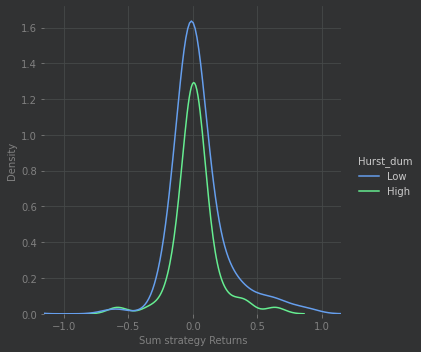

In [ ]:
# We are going to plot the density of the strategy returns by the HURST
g["Hurst_dum"] = "Low"
g.loc[g["Hurst"]>0.56, "Hurst_dum"] = "High"

# Plot the densities
sns.displot(data=g, x="Sum strategy Returns", kind="kde", hue="Hurst_dum")

# Limit the axis
plt.xlim((-1.15,1.15))

# plot the graph
plt.show()

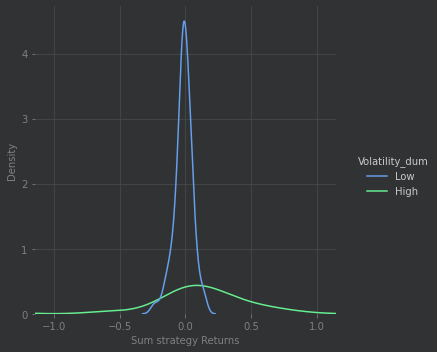

In [ ]:
# We are going to plot the density of the strategy returns by the classe of the assets
g["Volatility_dum"] = "Low"
g.loc[g["Volatility"]>0.52,"Volatility_dum"] = "High"
# Plot the densities
sns.displot(data=g, x="Sum strategy Returns", kind="kde", hue="Volatility_dum")

# Limit the axis
plt.xlim((-1.15,1.15))

# plot the graph
plt.show()

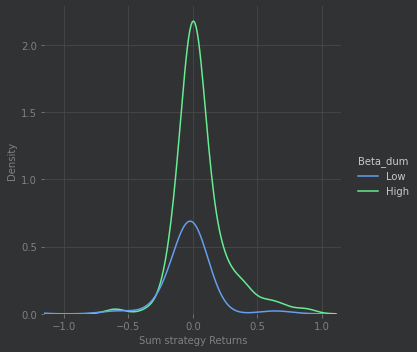

In [ ]:
# We are going to plot the density of the strategy returns by the classe of the assets
g["Beta_dum"] = "Low"
g.loc[g["Beta"]>1,"Beta_dum"] = "High"
# Plot the densities
sns.displot(data=g, x="Sum strategy Returns", kind="kde", hue="Beta_dum")

# Limit the axis
plt.xlim((-1.15,1.15))

# plot the graph
plt.show()

###Hyper Paramaters optimization

[*********************100%***********************]  1 of 1 completed


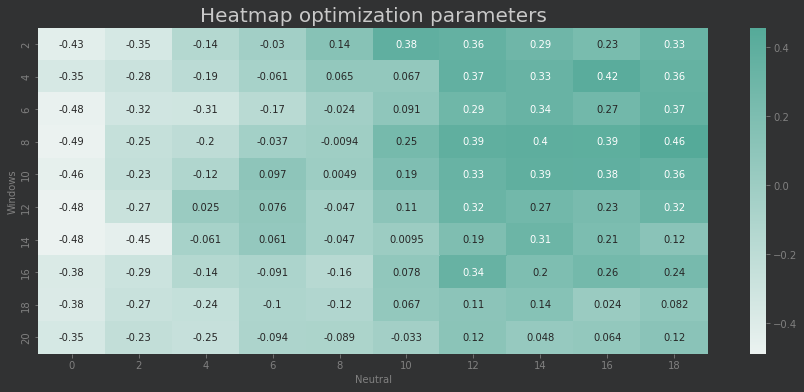

In [ ]:
# Import the data
f = yf.download("GOOG")

# We set lists for the possible values of neutral and window
neutral_values = [i*2 for i in range(10)]
window_values = [i*2 for i in range(1,11)]


# We set matrix with only zeros 
grid = np.zeros([len(neutral_values), len(window_values)])

# We will in parmters calculate the return of the strategy for each combinaison
for i in range(len(neutral_values)):
  for j in range(len(window_values)):

    # Compute return strategy
    return_rsi = RSI(f, neutral_values[i], window_values[j])

    # Compute annualized sortino
    grid[i][j] = np.sqrt(252) * return_rsi.mean() / (return_rsi[return_rsi<0].std()+0.00001)

# Adapt the size
plt.figure(figsize=(15,6))

# Palette for color
pal = sns.color_palette("light:#5A9", as_cmap=True)

# Plot the heatmap
sns.heatmap(grid, annot=True, xticklabels=neutral_values, yticklabels=window_values, cmap = pal)

# Put a title
plt.title("Heatmap optimization parameters", size=20)

# Put a xlabel
plt.xlabel("Neutral")

# Put a xlabel
plt.ylabel("Windows")

# Show the graph
plt.show()

In [ ]:
# We create just a function for the previous code
def grid_parameters(f):

  # We set lists for the possible values of neutral and window
  neutral_values = [i*2 for i in range(10)]
  window_values = [i*2 for i in range(1,11)]

  # We set matrix with only zeros 
  grid = np.zeros([len(neutral_values), len(window_values)])

  # We wil calculate the return of the strategy for each combinaison
  for i in range(len(neutral_values)):
    for j in range(len(window_values)):

      # Compute return strategy
      return_rsi = RSI(f, neutral_values[i], window_values[j])

      # Compute annualized sortino
      grid[i][j] = np.sqrt(252) * return_rsi.mean() / return_rsi[return_rsi<0].std()

  return grid

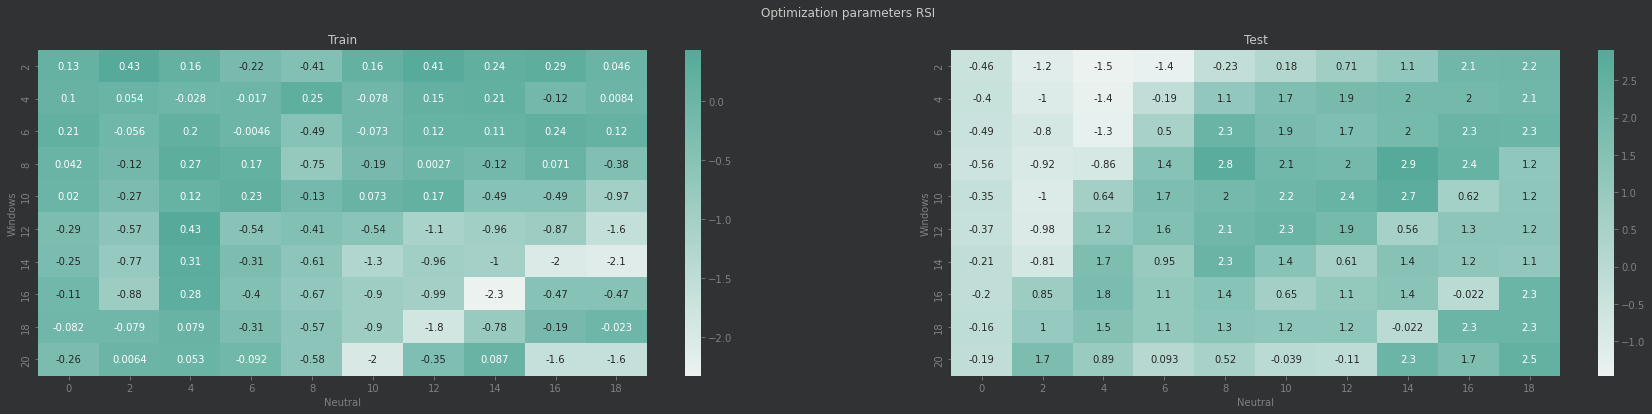

In [ ]:
# We set lists for the possible values of neutral and window
neutral_values = [i*2 for i in range(10)]
window_values = [i*2 for i in range(1,11)]

# Set some datasets
start_train, end_train = "2017-01-01", "2019-01-01"
start_test, end_test = "2019-01-01", "2020-01-01"
start_valid, end_valid = "2020-01-01", "2021-01-01"

# Create the grids
grid_train = grid_parameters(f.loc[start_train:end_train])
grid_test = grid_parameters(f.loc[start_test:end_test])

# Create a subplots
fig, (train,test) = plt.subplots(1,2,figsize=(30,6))

# Put a sup title
fig.suptitle("Optimization parameters RSI")

# Change the color
pal = sns.color_palette("light:#5A9", as_cmap=True)

# Train
# Put train heatmap
sns.heatmap(grid_train, annot=True, ax=train, xticklabels=neutral_values, yticklabels=window_values, cmap = pal)

# Set a title
train.set_title("Train")

# Set a xlabel
train.set_xlabel("Neutral")

# Set a ylabel
train.set_ylabel("Windows")


# Test
# Put test heatmap
sns.heatmap(grid_test, annot=True, ax=test, xticklabels=neutral_values, yticklabels=window_values, cmap= pal)

# Set a title
test.set_title("Test")

# Set a xlabel
test.set_xlabel("Neutral")

# Set a ylabel
test.set_ylabel("Windows")   


# Show the graph
plt.show()

[*********************100%***********************]  1 of 1 completed


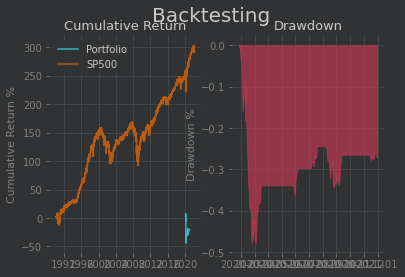

Sortino : -0.636
Beta : 0.631
Alpha : -0.09
MaxDrawdown : 47.752 %


In [ ]:
# BackTest
Backtest(RSI(f.loc[start_valid:end_valid],16,6))

In [ ]:
# statistical slection parameters

# We set lists for the possible values of neutral and window
neutral_values = [i*2 for i in range(10)]
window_values = [i*2 for i in range(1,11)]

# Set some Border of the datasets
start_train, end_train = "2017-01-01", "2019-01-01"
start_test, end_test = "2019-01-01", "2020-01-01"
start_valid, end_valid = "2020-01-01", "2021-01-01"

# Initialize the list
resume = []

# Loop to add the values in the list
for i in range(len(neutral_values)):
    for j in range(len(window_values)):

      # Compute the returns
      return_train = RSI(f.loc[start_train:end_train], neutral_values[i], window_values[j])
      return_test = RSI(f.loc[start_test:end_test], neutral_values[i], window_values[j])

      # Compute the Sortino
      sortino_train = np.sqrt(252) * return_train.mean() / return_train[return_train<0].std()
      sortino_test = np.sqrt(252) * return_test.mean() / return_test[return_test<0].std()

      # We do list of list to do a dataframe
      values = [neutral_values[i], window_values[j], sortino_train, sortino_test]
      resume.append(values)

resume = pd.DataFrame(resume, columns=["Neutral", "Window", "Sortino Train", "Sortino test"])

In [ ]:
# Order by Sortino
ordered_resume = resume.sort_values(by="Sortino Train", ascending=False)


best = ordered_resume.iloc[0:1,:]

# Compute the sortino
Strain = best["Sortino Train"].values[0]
Stest = best["Sortino test"].values[0]
# Initialize the i
i = 0

for i in range(len(resume)):
    # Take the best
    best = ordered_resume.iloc[0+i:1+i,:]

    # Compute the sortino
    Strain = best["Sortino Train"].values[0]
    Stest = best["Sortino test"].values[0]

    # Take best neutral and best window
    best_neutral = best["Neutral"].values[0]
    best_window = best["Window"].values[0]

    if Stest>0.5 and Strain>0.5:
      break

    # If there is no optimal parameters  
    else:
      best_neutral = 0
      best_window = 0
      Strain = 0
      Stest = 0

In [ ]:
# Plot the values
best_neutral, best_window, Strain, Stest

(0, 0, 0, 0)

[*********************100%***********************]  1 of 1 completed


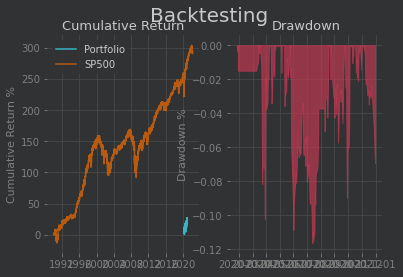

Sortino : 1.12
Beta : 0.631
Alpha : 0.079
MaxDrawdown : 11.638 %


In [ ]:
# BackTest
Backtest(RSI(f.loc[start_valid:end_valid],0,14))

In [ ]:
def opt(f):
  # We set lists for the possible values of neutral and window
  neutral_values = [i*2 for i in range(10)]
  window_values = [i*2 for i in range(1,11)]

  # Set some Border of the datasets
  start_train, end_train = "2017-01-01", "2019-01-01"
  start_test, end_test = "2019-01-01", "2020-01-01"
  start_valid, end_valid = "2020-01-01", "2021-01-01"


  # Initialize the list
  resume = []

  # Loop to add the values in the list
  for i in range(len(neutral_values)):
      for j in range(len(window_values)):
        # Compute the returns
        return_train = RSI(f.loc[start_train:end_train], neutral_values[i], window_values[j])
        return_test = RSI(f.loc[start_test:end_test], neutral_values[i], window_values[j])

        # Compute the sortino
        sortino_train = np.sqrt(252) * return_train.mean() / return_train[return_train<0].std()
        sortino_test = np.sqrt(252) * return_test.mean() / return_test[return_test<0].std()

        # We do list of list to do a dataframe
        values = [neutral_values[i], window_values[j], sortino_train, sortino_test]
        resume.append(values)

  resume = pd.DataFrame(resume, columns=["Neutral", "Window", "Sortino Train", "Sortino test"])

  # Order by sortino
  ordered_resume = resume.sort_values(by="Sortino Train", ascending=False)



  for i in range(len(resume)):
    # Take the best
    best = ordered_resume.iloc[0+i:1+i,:]

    # Compute the sortino
    Strain = best["Sortino Train"].values[0]
    Stest = best["Sortino test"].values[0]

    # Take best neutral and best window
    best_neutral = best["Neutral"].values[0]
    best_window = best["Window"].values[0]

    # If the Sortino of the train and the test are good we stop the loop
    if Stest>0.5 and Strain>0.5:
      break

    # If there is no values enought good the put 0 in all values
    else:
      best_neutral = 0
      best_window = 0
      Strain = 0
      Stest = 0
  return [best_neutral, best_window, Strain, Stest]

In [ ]:
# Find optimal parameters
m = yf.download("GOOG")
opt(m.dropna())

[*********************100%***********************]  1 of 1 completed


[0, 0, 0, 0]

[*********************100%***********************]  1 of 1 completed


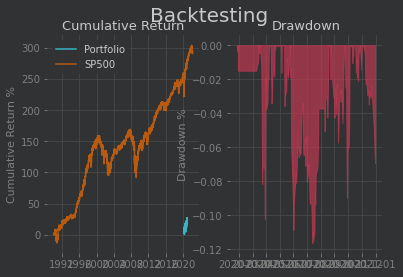

Sortino : 1.12
Beta : 0.631
Alpha : 0.079
MaxDrawdown : 11.638 %


In [ ]:
# BackTest
Backtest(RSI(m.loc[start_valid:end_valid], 0, 14))

###Sortino optimization

In [ ]:
# Import Yahoo name
assets = pd.read_csv("/content/Names.csv")["Symbol"]

# Initialize the lists
resume = []
col = []

# Compute best parameters for each Asset
for fin in tqdm(assets):

  # Import the asset
  arr = yf.download(fin)

  # Put the values
  resume.append(opt(arr))
  col.append(fin)

  0%|          | 0/152 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed


  1%|          | 1/152 [00:05<14:31,  5.77s/it]

[*********************100%***********************]  1 of 1 completed


  1%|▏         | 2/152 [00:09<11:19,  4.53s/it]

[*********************100%***********************]  1 of 1 completed


  2%|▏         | 3/152 [00:13<10:13,  4.12s/it]

[*********************100%***********************]  1 of 1 completed


  3%|▎         | 4/152 [00:16<09:39,  3.91s/it]

[*********************100%***********************]  1 of 1 completed


  3%|▎         | 5/152 [00:20<09:28,  3.87s/it]

[*********************100%***********************]  1 of 1 completed


  4%|▍         | 6/152 [00:27<11:53,  4.89s/it]

[*********************100%***********************]  1 of 1 completed


  5%|▍         | 7/152 [00:31<11:30,  4.76s/it]

[*********************100%***********************]  1 of 1 completed


  5%|▌         | 8/152 [00:36<11:14,  4.68s/it]

[*********************100%***********************]  1 of 1 completed


  6%|▌         | 9/152 [00:40<10:28,  4.40s/it]

[*********************100%***********************]  1 of 1 completed


  7%|▋         | 10/152 [00:45<10:51,  4.59s/it]

[*********************100%***********************]  1 of 1 completed


  7%|▋         | 11/152 [00:49<10:30,  4.48s/it]

[*********************100%***********************]  1 of 1 completed


  8%|▊         | 12/152 [00:54<10:41,  4.59s/it]

[*********************100%***********************]  1 of 1 completed


  9%|▊         | 13/152 [00:58<10:23,  4.49s/it]

[*********************100%***********************]  1 of 1 completed


  9%|▉         | 14/152 [01:03<10:40,  4.64s/it]

[*********************100%***********************]  1 of 1 completed


 10%|▉         | 15/152 [01:07<10:06,  4.43s/it]

[*********************100%***********************]  1 of 1 completed


 11%|█         | 16/152 [01:11<09:29,  4.19s/it]

[*********************100%***********************]  1 of 1 completed


 11%|█         | 17/152 [01:16<10:08,  4.50s/it]

[*********************100%***********************]  1 of 1 completed


 12%|█▏        | 18/152 [01:22<10:56,  4.90s/it]

[*********************100%***********************]  1 of 1 completed


 12%|█▎        | 19/152 [01:29<12:18,  5.55s/it]

[*********************100%***********************]  1 of 1 completed


 13%|█▎        | 20/152 [01:32<10:54,  4.96s/it]

[*********************100%***********************]  1 of 1 completed


 14%|█▍        | 21/152 [01:41<13:08,  6.02s/it]

[*********************100%***********************]  1 of 1 completed


 14%|█▍        | 22/152 [01:46<12:53,  5.95s/it]

[*********************100%***********************]  1 of 1 completed


 15%|█▌        | 23/152 [01:53<13:15,  6.17s/it]

[*********************100%***********************]  1 of 1 completed


 16%|█▌        | 24/152 [01:59<13:02,  6.11s/it]

[*********************100%***********************]  1 of 1 completed


 16%|█▋        | 25/152 [02:03<11:28,  5.42s/it]

[*********************100%***********************]  1 of 1 completed


 17%|█▋        | 26/152 [02:07<10:15,  4.88s/it]

[*********************100%***********************]  1 of 1 completed


 18%|█▊        | 27/152 [02:12<10:37,  5.10s/it]

[*********************100%***********************]  1 of 1 completed


 18%|█▊        | 28/152 [02:17<10:23,  5.03s/it]

[*********************100%***********************]  1 of 1 completed


 19%|█▉        | 29/152 [02:24<11:20,  5.53s/it]

[*********************100%***********************]  1 of 1 completed


 20%|█▉        | 30/152 [02:29<11:08,  5.48s/it]

[*********************100%***********************]  1 of 1 completed


 20%|██        | 31/152 [02:33<09:58,  4.94s/it]

[*********************100%***********************]  1 of 1 completed


 21%|██        | 32/152 [02:37<09:08,  4.57s/it]

[*********************100%***********************]  1 of 1 completed


 22%|██▏       | 33/152 [02:40<08:33,  4.31s/it]

[*********************100%***********************]  1 of 1 completed


 22%|██▏       | 34/152 [02:44<08:08,  4.14s/it]

[*********************100%***********************]  1 of 1 completed


 23%|██▎       | 35/152 [02:49<08:23,  4.30s/it]

[*********************100%***********************]  1 of 1 completed


 24%|██▎       | 36/152 [02:54<08:46,  4.54s/it]

[*********************100%***********************]  1 of 1 completed


 24%|██▍       | 37/152 [02:57<08:06,  4.23s/it]

[*********************100%***********************]  1 of 1 completed


 25%|██▌       | 38/152 [03:01<07:37,  4.01s/it]

[*********************100%***********************]  1 of 1 completed


 26%|██▌       | 39/152 [03:04<07:16,  3.86s/it]

[*********************100%***********************]  1 of 1 completed


 26%|██▋       | 40/152 [03:08<07:08,  3.82s/it]

[*********************100%***********************]  1 of 1 completed


 27%|██▋       | 41/152 [03:11<06:51,  3.71s/it]

[*********************100%***********************]  1 of 1 completed


 28%|██▊       | 42/152 [03:15<06:40,  3.64s/it]

[*********************100%***********************]  1 of 1 completed


 28%|██▊       | 43/152 [03:18<06:33,  3.61s/it]

[*********************100%***********************]  1 of 1 completed


 29%|██▉       | 44/152 [03:22<06:27,  3.59s/it]

[*********************100%***********************]  1 of 1 completed


 30%|██▉       | 45/152 [03:25<06:22,  3.57s/it]

[*********************100%***********************]  1 of 1 completed


 30%|███       | 46/152 [03:29<06:14,  3.54s/it]

[*********************100%***********************]  1 of 1 completed


 31%|███       | 47/152 [03:32<06:11,  3.54s/it]

[*********************100%***********************]  1 of 1 completed


 32%|███▏      | 48/152 [03:37<06:36,  3.82s/it]

[*********************100%***********************]  1 of 1 completed


 32%|███▏      | 49/152 [03:41<06:25,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 33%|███▎      | 50/152 [03:44<06:13,  3.66s/it]

[*********************100%***********************]  1 of 1 completed


 34%|███▎      | 51/152 [03:48<06:16,  3.73s/it]

[*********************100%***********************]  1 of 1 completed


 34%|███▍      | 52/152 [03:52<06:16,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 35%|███▍      | 53/152 [03:55<06:08,  3.72s/it]

[*********************100%***********************]  1 of 1 completed


 36%|███▌      | 54/152 [03:59<06:01,  3.68s/it]

[*********************100%***********************]  1 of 1 completed


 36%|███▌      | 55/152 [04:03<05:54,  3.66s/it]

[*********************100%***********************]  1 of 1 completed


 37%|███▋      | 56/152 [04:06<05:55,  3.70s/it]

[*********************100%***********************]  1 of 1 completed


 38%|███▊      | 57/152 [04:10<05:52,  3.71s/it]

[*********************100%***********************]  1 of 1 completed


 38%|███▊      | 58/152 [04:14<05:46,  3.68s/it]

[*********************100%***********************]  1 of 1 completed


 39%|███▉      | 59/152 [04:17<05:39,  3.65s/it]

[*********************100%***********************]  1 of 1 completed


 39%|███▉      | 60/152 [04:21<05:40,  3.70s/it]

[*********************100%***********************]  1 of 1 completed


 40%|████      | 61/152 [04:28<07:07,  4.69s/it]

[*********************100%***********************]  1 of 1 completed


 41%|████      | 62/152 [04:32<06:50,  4.56s/it]

[*********************100%***********************]  1 of 1 completed


 41%|████▏     | 63/152 [04:36<06:22,  4.30s/it]

[*********************100%***********************]  1 of 1 completed


 42%|████▏     | 64/152 [04:40<06:04,  4.14s/it]

[*********************100%***********************]  1 of 1 completed


 43%|████▎     | 65/152 [04:44<05:53,  4.07s/it]

[*********************100%***********************]  1 of 1 completed


 43%|████▎     | 66/152 [04:47<05:38,  3.94s/it]

[*********************100%***********************]  1 of 1 completed


 44%|████▍     | 67/152 [04:51<05:27,  3.85s/it]

[*********************100%***********************]  1 of 1 completed


 45%|████▍     | 68/152 [04:55<05:17,  3.78s/it]

[*********************100%***********************]  1 of 1 completed


 45%|████▌     | 69/152 [04:58<05:10,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 46%|████▌     | 70/152 [05:02<05:08,  3.77s/it]

[*********************100%***********************]  1 of 1 completed


 47%|████▋     | 71/152 [05:06<05:05,  3.77s/it]

[*********************100%***********************]  1 of 1 completed


 47%|████▋     | 72/152 [05:10<05:01,  3.77s/it]

[*********************100%***********************]  1 of 1 completed


 48%|████▊     | 73/152 [05:16<05:54,  4.49s/it]

[*********************100%***********************]  1 of 1 completed


 49%|████▊     | 74/152 [05:21<05:57,  4.58s/it]

[*********************100%***********************]  1 of 1 completed


 49%|████▉     | 75/152 [05:25<05:50,  4.55s/it]

[*********************100%***********************]  1 of 1 completed


 50%|█████     | 76/152 [05:29<05:28,  4.32s/it]

[*********************100%***********************]  1 of 1 completed


 51%|█████     | 77/152 [05:33<05:11,  4.15s/it]

[*********************100%***********************]  1 of 1 completed


 51%|█████▏    | 78/152 [05:36<04:59,  4.05s/it]

[*********************100%***********************]  1 of 1 completed


 52%|█████▏    | 79/152 [05:40<04:46,  3.92s/it]

[*********************100%***********************]  1 of 1 completed


 53%|█████▎    | 80/152 [05:44<04:35,  3.83s/it]

[*********************100%***********************]  1 of 1 completed


 53%|█████▎    | 81/152 [05:47<04:27,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 54%|█████▍    | 82/152 [05:51<04:24,  3.78s/it]

[*********************100%***********************]  1 of 1 completed


 55%|█████▍    | 83/152 [05:55<04:19,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 55%|█████▌    | 84/152 [05:59<04:17,  3.79s/it]

[*********************100%***********************]  1 of 1 completed


 56%|█████▌    | 85/152 [06:02<04:07,  3.70s/it]

[*********************100%***********************]  1 of 1 completed


 57%|█████▋    | 86/152 [06:06<04:02,  3.67s/it]

[*********************100%***********************]  1 of 1 completed


 57%|█████▋    | 87/152 [06:09<03:58,  3.67s/it]

[*********************100%***********************]  1 of 1 completed


 58%|█████▊    | 88/152 [06:13<03:56,  3.69s/it]

[*********************100%***********************]  1 of 1 completed


 59%|█████▊    | 89/152 [06:17<04:03,  3.87s/it]

[*********************100%***********************]  1 of 1 completed


 59%|█████▉    | 90/152 [06:21<03:58,  3.85s/it]

[*********************100%***********************]  1 of 1 completed


 60%|█████▉    | 91/152 [06:25<03:52,  3.81s/it]

[*********************100%***********************]  1 of 1 completed


 61%|██████    | 92/152 [06:29<03:47,  3.79s/it]

[*********************100%***********************]  1 of 1 completed


 61%|██████    | 93/152 [06:32<03:41,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 62%|██████▏   | 94/152 [06:36<03:36,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 62%|██████▎   | 95/152 [06:40<03:33,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 63%|██████▎   | 96/152 [06:44<03:29,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 64%|██████▍   | 97/152 [06:47<03:22,  3.67s/it]

[*********************100%***********************]  1 of 1 completed


 64%|██████▍   | 98/152 [06:51<03:14,  3.61s/it]

[*********************100%***********************]  1 of 1 completed


 65%|██████▌   | 99/152 [06:54<03:10,  3.59s/it]

[*********************100%***********************]  1 of 1 completed


 66%|██████▌   | 100/152 [06:58<03:05,  3.57s/it]

[*********************100%***********************]  1 of 1 completed


 66%|██████▋   | 101/152 [07:01<03:02,  3.59s/it]

[*********************100%***********************]  1 of 1 completed


 67%|██████▋   | 102/152 [07:05<03:01,  3.62s/it]

[*********************100%***********************]  1 of 1 completed


 68%|██████▊   | 103/152 [07:09<02:57,  3.62s/it]

[*********************100%***********************]  1 of 1 completed


 68%|██████▊   | 104/152 [07:12<02:56,  3.68s/it]

[*********************100%***********************]  1 of 1 completed


 69%|██████▉   | 105/152 [07:16<02:54,  3.72s/it]

[*********************100%***********************]  1 of 1 completed


 70%|██████▉   | 106/152 [07:20<02:49,  3.68s/it]

[*********************100%***********************]  1 of 1 completed


 70%|███████   | 107/152 [07:24<02:48,  3.74s/it]

[*********************100%***********************]  1 of 1 completed


 71%|███████   | 108/152 [07:27<02:44,  3.73s/it]

[*********************100%***********************]  1 of 1 completed


 72%|███████▏  | 109/152 [07:31<02:42,  3.79s/it]

[*********************100%***********************]  1 of 1 completed


 72%|███████▏  | 110/152 [07:35<02:37,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 73%|███████▎  | 111/152 [07:39<02:38,  3.86s/it]

[*********************100%***********************]  1 of 1 completed


 74%|███████▎  | 112/152 [07:43<02:33,  3.84s/it]

[*********************100%***********************]  1 of 1 completed


 74%|███████▍  | 113/152 [07:47<02:29,  3.84s/it]

[*********************100%***********************]  1 of 1 completed


 75%|███████▌  | 114/152 [07:51<02:25,  3.83s/it]

[*********************100%***********************]  1 of 1 completed


 76%|███████▌  | 115/152 [07:54<02:20,  3.80s/it]

[*********************100%***********************]  1 of 1 completed


 76%|███████▋  | 116/152 [07:58<02:15,  3.75s/it]

[*********************100%***********************]  1 of 1 completed


 77%|███████▋  | 117/152 [08:02<02:11,  3.77s/it]

[*********************100%***********************]  1 of 1 completed


 78%|███████▊  | 118/152 [08:06<02:08,  3.79s/it]

[*********************100%***********************]  1 of 1 completed


 78%|███████▊  | 119/152 [08:09<02:04,  3.77s/it]

[*********************100%***********************]  1 of 1 completed


 79%|███████▉  | 120/152 [08:13<01:58,  3.71s/it]

[*********************100%***********************]  1 of 1 completed


 80%|███████▉  | 121/152 [08:16<01:53,  3.66s/it]

[*********************100%***********************]  1 of 1 completed


 80%|████████  | 122/152 [08:20<01:51,  3.73s/it]

[*********************100%***********************]  1 of 1 completed


 81%|████████  | 123/152 [08:24<01:48,  3.73s/it]

[*********************100%***********************]  1 of 1 completed


 82%|████████▏ | 124/152 [08:27<01:42,  3.66s/it]

[*********************100%***********************]  1 of 1 completed


 82%|████████▏ | 125/152 [08:31<01:38,  3.63s/it]

[*********************100%***********************]  1 of 1 completed


 83%|████████▎ | 126/152 [08:35<01:34,  3.64s/it]

[*********************100%***********************]  1 of 1 completed


 84%|████████▎ | 127/152 [08:38<01:31,  3.66s/it]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALXN: No data found, symbol may be delisted


 84%|████████▍ | 128/152 [08:45<01:51,  4.64s/it]

[*********************100%***********************]  1 of 1 completed


 85%|████████▍ | 129/152 [08:49<01:41,  4.41s/it]

[*********************100%***********************]  1 of 1 completed


 86%|████████▌ | 130/152 [08:53<01:33,  4.24s/it]

[*********************100%***********************]  1 of 1 completed


 86%|████████▌ | 131/152 [08:57<01:26,  4.11s/it]

[*********************100%***********************]  1 of 1 completed


 87%|████████▋ | 132/152 [09:01<01:20,  4.02s/it]

[*********************100%***********************]  1 of 1 completed


 88%|████████▊ | 133/152 [09:04<01:14,  3.92s/it]

[*********************100%***********************]  1 of 1 completed


 88%|████████▊ | 134/152 [09:08<01:08,  3.82s/it]

[*********************100%***********************]  1 of 1 completed


 89%|████████▉ | 135/152 [09:11<01:03,  3.72s/it]

[*********************100%***********************]  1 of 1 completed


 89%|████████▉ | 136/152 [09:15<00:58,  3.67s/it]

[*********************100%***********************]  1 of 1 completed


 90%|█████████ | 137/152 [09:19<00:55,  3.69s/it]

[*********************100%***********************]  1 of 1 completed


 91%|█████████ | 138/152 [09:22<00:51,  3.69s/it]

[*********************100%***********************]  1 of 1 completed


 91%|█████████▏| 139/152 [09:26<00:47,  3.67s/it]

[*********************100%***********************]  1 of 1 completed


 92%|█████████▏| 140/152 [09:30<00:44,  3.69s/it]

[*********************100%***********************]  1 of 1 completed


 93%|█████████▎| 141/152 [09:33<00:40,  3.68s/it]

[*********************100%***********************]  1 of 1 completed


 93%|█████████▎| 142/152 [09:37<00:36,  3.69s/it]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MXIM: No data found, symbol may be delisted


 94%|█████████▍| 143/152 [09:44<00:42,  4.75s/it]

[*********************100%***********************]  1 of 1 completed


 95%|█████████▍| 144/152 [09:48<00:35,  4.40s/it]

[*********************100%***********************]  1 of 1 completed


 95%|█████████▌| 145/152 [09:52<00:29,  4.15s/it]

[*********************100%***********************]  1 of 1 completed


 96%|█████████▌| 146/152 [09:55<00:23,  3.97s/it]

[*********************100%***********************]  1 of 1 completed


 97%|█████████▋| 147/152 [09:59<00:19,  3.88s/it]

[*********************100%***********************]  1 of 1 completed


 97%|█████████▋| 148/152 [10:02<00:15,  3.76s/it]

[*********************100%***********************]  1 of 1 completed


 98%|█████████▊| 149/152 [10:06<00:11,  3.70s/it]

[*********************100%***********************]  1 of 1 completed


 99%|█████████▊| 150/152 [10:09<00:07,  3.70s/it]

[*********************100%***********************]  1 of 1 completed


 99%|█████████▉| 151/152 [10:13<00:03,  3.65s/it]

[*********************100%***********************]  1 of 1 completed


100%|██████████| 152/152 [10:17<00:00,  4.06s/it]


In [ ]:
# Add asset columns to each list of resume
for i in range(len(resume)):
  resume[i].append(col[i])

# Create a dataframe
res = pd.DataFrame(resume, columns=["Neutral", "Window", "Train", "Test", "Asset"])

# Indexig by asset
res = res.set_index("Asset")
res

,Neutral,Window,Train,Test
Asset,,,,
EURUSD=X,0,0,0.000000,0.000000
EURGBP=X,14,18,1.505166,1.143735
EURCHF=X,8,2,1.343851,1.956860
EURCAD=X,0,0,0.000000,0.000000
EURCNY=X,0,0,0.000000,0.000000
...,...,...,...,...
TCOM,0,14,1.121653,0.878822
INCY,4,16,1.028423,0.725419
CHKP,0,0,0.000000,0.000000


In [ ]:
# Order the dataframe using the Train sortino
values = res.sort_values(by="Train", ascending=False)
values.head(20)

,Neutral,Window,Train,Test
Asset,,,,
MRNA,4,18,71.525336,0.500044
BSV-USD,14,8,11.180929,1.550681
TRX-USD,6,16,4.869989,2.302700
SBUX,18,20,4.820206,2.729103
DLTR,18,20,4.573633,0.658806
AUDJPY=X,6,6,4.094859,3.236550
XRP-USD,6,14,3.873649,0.609645
BNB-USD,0,14,3.833512,0.511782
USDCHF=X,4,8,3.567400,2.098895


In [ ]:
# Border of sets
start_train, end_train = "2017-01-01", "2019-01-01"
start_test, end_test = "2019-01-01", "2020-01-01"
start_valid, end_valid = "2020-01-01", "2021-01-01"

# Create a dataframe to put the strategies (The assets of the portfolio)
strategies = pd.DataFrame()
for col in values.index[0:15]:
  
  # Import the asset
  l = yf.download(col)

  # Extract opptimal neutral
  best_neutral = values.loc[col]["Neutral"]

  # Exctract optimal window
  best_window = values.loc[col]["Window"]
  
  strategies[f"{col}"] = RSI(l.loc[start_train:],best_neutral,int(best_window))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
strategies

,MRNA,BSV-USD,TRX-USD,SBUX,DLTR,AUDJPY=X,XRP-USD,BNB-USD,USDCHF=X,USDJPY=X,WDAY,THETA-USD,CDW,VET-USD,BIIB
Date,,,,,,,,,,,,,,,
2018-12-07,NaN,NaN,0.031833,-0.016228,-0.033159,0.008095,-0.028749,0.085433,0.003831,-0.000000,-0.045798,0.036830,-0.042495,0.046693,-0.030517
2018-12-10,NaN,NaN,-0.022605,0.000305,0.005156,0.008591,-0.030647,0.030220,0.003504,0.001659,-0.004675,-0.010330,0.009401,0.058231,0.008556
2018-12-11,NaN,NaN,-0.001952,0.006566,0.011811,-0.007440,-0.007970,-0.048477,0.000222,-0.006035,0.020416,0.058982,-0.001876,0.026872,0.001096
2018-12-12,0.037202,NaN,0.004665,0.003186,-0.002712,0.004866,0.019838,-0.016686,0.003699,0.001794,0.015834,0.013489,0.008371,0.000268,0.008818
2018-12-13,0.004283,NaN,-0.022092,0.011795,0.005557,-0.000061,-0.023744,0.074144,-0.000564,-0.000873,-0.005256,-0.066528,-0.019006,0.053902,-0.007656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,-0.102181,0.059297,0.004906,0.042857,0.006471,0.005559,0.064162,-0.030362,0.000000,-0.003025,0.061983,-0.079939,-0.037747,-0.043186,-0.001287
2022-03-10,-0.020844,-0.055694,-0.015976,-0.005023,0.006768,0.008646,-0.038803,0.054368,-0.003303,0.001616,-0.021753,-0.061633,-0.005146,0.033230,-0.017946
2022-03-11,-0.009461,-0.007816,0.006648,-0.050826,-0.011630,0.009068,0.087719,-0.000067,0.003119,0.002329,-0.015496,-0.031846,-0.000705,0.016899,-0.004883


In [ ]:
strategies = strategies.iloc[:,1:]


In [ ]:
from scipy.optimize import minimize

In [ ]:
def SR_criterion(weight, returns):
  """ 
  ------------------------------------------------------------------------------
  | Output: Opposite Sortino ratio to do a m imization                          |
  ------------------------------------------------------------------------------
  | Inputs: -Weight (type ndarray numpy): Wheight for portfolio                |
  |         -returns (type dataframe pandas): Returns of stocks                |
  ------------------------------------------------------------------------------
  """
  pf_return = returns.values.dot(weight)
  mu = np.mean(pf_return) 
  sigma = np.std(pf_return[pf_return<0])
  Sortino = -mu/sigma
  return Sortino




n=len(strategies.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})

Bounds= [(0 , 1) for i in range(0,n)]


# Optimization problem solving
res_SR = minimize(SR_criterion, x0, method="SLSQP", args=(strategies.loc[start_train:end_test].dropna()),bounds=Bounds,constraints=cons,options={'disp': False})

# Result for visualization

# Result for computations
X = res_SR.x

[*********************100%***********************]  1 of 1 completed


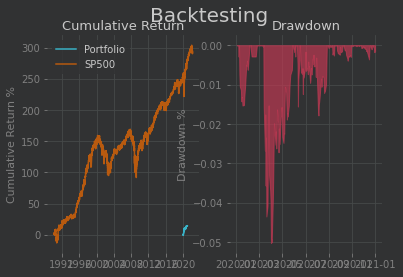

Sortino : 2.149
Beta : 0.631
Alpha : 0.053
MaxDrawdown : 5.017 %


In [ ]:
# BackTest Sortino Optimization
sr = np.multiply(strategies.loc[start_valid:end_valid], X).sum(axis=1)
Backtest(sr)

###Min Variance Optimization

In [ ]:
def MV_criterion(weight,Returns_data):
  """ 
  ------------------------------------------------------------------------------
  | Output: optimization porfolio criterion                                    |
  ------------------------------------------------------------------------------
  | Inputs: -weight (type ndarray numpy): Wheight for portfolio                |
  |         -Returns_data (type ndarray numpy): Returns of stocks              |
  ------------------------------------------------------------------------------
  """
  portfolio_return=np.multiply(Returns_data,np.transpose(weight));
  portfolio_return=np.sum(portfolio_return,1);
  mean_ret=np.mean(portfolio_return,0)
  sd_ret=np.std(portfolio_return,0)
  criterion = sd_ret
  return criterion




n=len(strategies.transpose())
# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})

Bounds= [(0 , 1) for i in range(0,n)]


# Optimization problem solving
res_SR = minimize(MV_criterion, x0, method="SLSQP", args=(strategies.loc[start_train:end_test].dropna()),bounds=Bounds,constraints=cons,options={'disp': False})

# Result for visualization

# Result for computations
X = res_SR.x

[*********************100%***********************]  1 of 1 completed


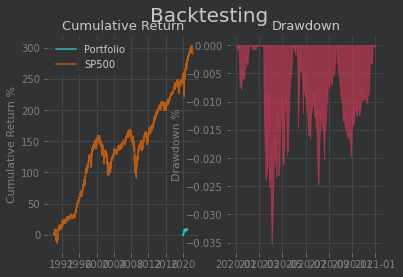

Sortino : 1.912
Beta : 0.631
Alpha : 0.034
MaxDrawdown : 3.506 %


In [ ]:
# BackTest MinVar Optimization
mv = np.multiply(strategies.loc[start_valid:end_valid], X).sum(axis=1)
Backtest(mv)

###Section3: Mean Variance Skewness Kurtosis Optimization

In [ ]:
def SK_criterion(weight,Returns_data):
  """ 
  ------------------------------------------------------------------------------
  | Output: optimization porfolio criterion                                    |
  ------------------------------------------------------------------------------
  | Inputs: -weight (type ndarray numpy): Wheight for portfolio                |
  |         -Returns_data (type ndarray numpy): Returns of stocks              |
  ------------------------------------------------------------------------------
  """
  from scipy.stats import skew, kurtosis

  Lambda_RA = 3
  portfolio_return=np.multiply(Returns_data,np.transpose(weight));
  portfolio_return=np.sum(portfolio_return,1);
  mean_ret=np.mean(portfolio_return,0)
  sd_ret=np.std(portfolio_return,0)
  skew_ret=skew(portfolio_return,0)
  kurt_ret=kurtosis(portfolio_return,0)
  W=1;
  Wbar=1*(1+0.25/100);
  criterion=np.power(Wbar,1-Lambda_RA)/(1+Lambda_RA)+np.power(Wbar,-Lambda_RA)*W*mean_ret-Lambda_RA/2*np.power(Wbar,-1-Lambda_RA)*np.power(W,2)*np.power(sd_ret,2)+Lambda_RA*(Lambda_RA+1)/(6)*np.power(Wbar,-2-Lambda_RA)*np.power(W,3)*skew_ret-Lambda_RA*(Lambda_RA+1)*(Lambda_RA+2)/(24)*np.power(Wbar,-3-Lambda_RA)*np.power(W,4)*kurt_ret
  criterion=-criterion;
  return criterion



n=len(strategies.transpose())
# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})

Bounds= [(0 , 1) for i in range(0,n)]


# Optimization problem solving
res_SR = minimize(SK_criterion, x0, method="SLSQP", args=(strategies.loc[start_train:end_test].dropna()),bounds=Bounds,constraints=cons,options={'disp': False})

# Result for visualization

# Result for computations
X = res_SR.x

[*********************100%***********************]  1 of 1 completed


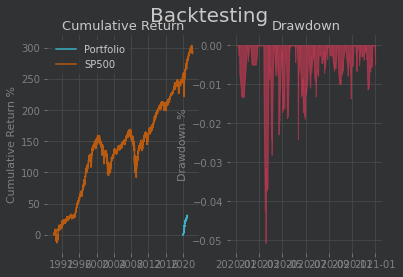

Sortino : 3.98
Beta : 0.631
Alpha : 0.112
MaxDrawdown : 5.068 %


In [ ]:
# Plot the performances
s = np.multiply(strategies.loc[start_valid:end_valid], X).sum(axis=1)
Backtest(s)

In [ ]:
import warnings
from datetime import datetime
import pandas as pd
warnings.filterwarnings("ignore")
mt5.initialize()


class MT5:

   def get_data(symbol, n, timeframe=mt5.TIMEFRAME_D1):
        """ Function to import the data of the chosen symbol"""

        # Initialize the connection if there is not
        mt5.initialize()

        # Current date extract
        utc_from = datetime.now()

        # Import the data into a tuple
        rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n)

        # Tuple to dataframe
        rates_frame = pd.DataFrame(rates)

        # Convert time in seconds into the datetime format
        rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

        # Convert the column "time" in the right format
        rates_frame['time'] = pd.to_datetime(rates_frame['time'], format='%Y-%m-%d')

        # Set column time as the index of the dataframe
        rates_frame = rates_frame.set_index('time')
        return rates_frame

   def orders(symbol, lot, buy=True, id_position=None):
       """ Send the orders """

       # Initialize the connection if there is not
       mt5.initialize()

       # Get filling mode 
       filling_mode = mt5.symbol_info(symbol).filling_mode - 1

       # Take ask price
       ask_price = mt5.symbol_info_tick(symbol).ask

       # Take bid price
       bid_price = mt5.symbol_info_tick(symbol).bid

       # Take the point of the asset
       point = mt5.symbol_info(symbol).point

       deviation = 20  # mt5.getSlippage(symbol)
       # **************************** Open a trade *****************************
       if id_position == None:

           # Buy order Parameters
           if buy:
               type_trade = mt5.ORDER_TYPE_BUY
               sl = ask_price*(1-0.01)
               tp = ask_price*(1+0.01)
               price = ask_price

           # Sell order Parameters
           else:
               type_trade = mt5.ORDER_TYPE_SELL
               sl = bid_price*(1+0.01)
               tp = bid_price*(1-0.01)
               price = bid_price

           # Open the trade
           request = {
               "action": mt5.TRADE_ACTION_DEAL,
               "symbol": symbol,
               "volume": lot,
               "type": type_trade,
               "price": price,
               "deviation": deviation,
               "sl": sl,
               "tp": tp,
               "magic": 234000,
               "comment": "python script order",
               "type_time": mt5.ORDER_TIME_GTC,
               "type_filling": filling_mode,
           }
           # send a trading request
           result = mt5.order_send(request)
           result_comment = result.comment

       # **************************** Close a trade *****************************
       else:
           # Buy order Parameters
           if buy:
               type_trade = mt5.ORDER_TYPE_SELL
               price = bid_price

           # Sell order Parameters
           else:
               type_trade = mt5.ORDER_TYPE_BUY
               price = ask_price

           # Close the trade
           request = {
               "action": mt5.TRADE_ACTION_DEAL,
               "symbol": symbol,
               "volume": lot,
               "type": type_trade,
               "position": id_position,
               "price": price,
               "deviation": deviation,
               "magic": 234000,
               "comment": "python script order",
               "type_time": mt5.ORDER_TIME_GTC,
               "type_filling": filling_mode,
           }

           # send a trading request
           result = mt5.order_send(request)
           result_comment = result.comment
       return result.comment

   def resume():
      """ Return the current positions. Position=0 --> Buy """
      # Initialize the connection if there is not
      mt5.initialize()

      # Define the name of the columns that we will create
      colonnes = ["ticket", "position", "symbol", "volume"]

      # Go take the current open trades
      current = mt5.positions_get()

      # Create a empty dataframe
      summary = pd.DataFrame()

      # Loop to add each row in dataframe
      # (Can be ameliorate using of list of list)
      for element in current:
           element_pandas = pd.DataFrame([element.ticket,
                                          element.type,
                                          element.symbol,
                                          element.volume],
                                         index=colonnes).transpose()
           summary = pd.concat((summary, element_pandas), axis=0)

      return summary


   def run(symbol, long, short, lot):

        # Initialize the connection if there is not
        mt5.initialize()

        # Choose your  symbol
        print("------------------------------------------------------------------")
        print("Date: ", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        print("SYMBOL:", symbol)

        # Initialize the device
        current_open_positions = MT5.resume()
        # Buy or sell
        print(f"BUY: {long} \t  SHORT: {short}")

        """ Close trade eventually """
        # Extraction type trade
        try:
            position = current_open_positions.loc[current_open_positions["symbol"]==symbol].values[0][1]

            identifier = current_open_positions.loc[current_open_positions["symbol"]==symbol].values[0][0]
        except:
            position= None
            identifier = None

        print(f"POSITION: {position} \t ID: {identifier}")

        # Close trades
        if long==True and position==0:
            long=False

        elif long==False and position==0:
            res = MT5.orders(symbol, lot, buy=True, id_position=identifier)
            print(f"CLOSE LONG TRADE: {res}")

        elif short==True and position ==1:
            short=False

        elif short == False and position == 1:
            res = MT5.orders(symbol, lot, buy=False, id_position=identifier)
            print(f"CLOSE SHORT TRADE: {res}")

        else:
            pass


        """ Buy or short """
        if long==True:

            res = MT5.orders(symbol, lot, buy=True, id_position=None)
            print(f"OPEN LONG TRADE: {res}")

        if short==True:
            res = MT5.orders(symbol, lot, buy=False, id_position=None)
            print(f"OPEN SHORT TRADE: {res}")

        print("------------------------------------------------------------------")

   def close_all_night():
        mt5.initialize()
        result = MT5.resume()
        for i in range(len(result)):
            row = result.iloc[0+i:1+i,:]
            if row["position"][0]==0:
                res = MT5.orders(row["symbol"][0], row["volume"][0], buy=True, id_position=row["ticket"][0])

            else:
                res = MT5.orders(row["symbol"][0], row["volume"][0], buy=False, id_position=row["ticket"][0])


NameError: ignored

In [ ]:
from Chapter_08_MT5 import *
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np

def random():
    values = [True, False]
    buy = np.random.choice(values)
    sell = not buy
    
    return buy, sell

symbols_list = {
    "Nasdaq 100": ["NAS100", 0.1],
    "Russel 2000": ["US2000", 0.1],
    "Gold USD": ["XAUUSD", 0.01],
    "S&P 500": ["US500", 0.1],
    "Us dollar vs Canadian dollar": ["USDCAD", 0.01],
    "Euro vs USdollar": ["EURUSD", 0.01]}


current_account_info = mt5.account_info()
print("------------------------------------------------------------------")
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Balance: {current_account_info.balance} USD,\t"
    f"Equity: {current_account_info.equity} USD, \t"
      f"Profit: {current_account_info.profit} USD")
print("------------------------------------------------------------------")



start = datetime.now().strftime("%H:%M:%S")#"23:59:59"

while True:

    # Launch the algorithm
    # Verfication for launch
    if datetime.now().weekday() not in (5,6):  
        is_time = datetime.now().strftime("%H:%M:%S") == start
    else:
        is_time = False

    if is_time:
        # Close all trades
        if mt5.positions_total() > 0:
            MT5.close_all_night()


        for asset in symbols_list.keys():
            # Initialize the inputs
            symbol = symbols_list[asset][0]
            lot = symbols_list[asset][1]

           
            buy, sell = random()

            # Run the algorithm
            MT5.run(symbol, buy, sell, lot)